# 推論

<div name="html-admonition" style="font-size: 0.8em">
<input type="button" onclick="location.href='https://translate.google.com/translate?hl=&sl=ja&tl=en&u='+window.location;" value="Google translation" style="color:#ffffff;background-color:#008080; height:25px" onmouseover="this.style.background='#99ccff'" onmouseout="this.style.background='#008080'"/> in English or the language of your choice.
</div><br>

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import wooldridge

from scipy.stats import t, f

# 警告メッセージを非表示
import warnings
warnings.filterwarnings("ignore")

## 説明：仮説検定

仮説検定は以下の手順でおこなう。
1. 母集団のパラメータについて帰無仮説（Null Hypothesis）と対立仮説（Alternative Hypothesis）を設定する。
    * 帰無仮説は棄却するかどうかの判断の対象となる仮説（例えば，$\hat{\beta}_1=0$）
    * 対立仮説は帰無仮説に相反する仮説（例えば，$\hat{\beta}_1\neq 0$）
1. 適切な検定統計量を決め，判定するための有意水準を予め決める。
    * 有意水準 ＝ 下で説明する**第一種過誤の確率（$\alpha$）**
1. 計算した検定統計量の値と有意水準に対応する値を比較することにより，帰無仮説を棄却するかしないかを判断する。２つの可能性しかない。
    * 帰無仮説を棄却する（対立仮説を採択する）。
    * 帰無仮説を棄却できない（対立仮説を採択できない）。

---
検定をおこなう際には間違いが発生する。それをまとめたのが次の表である。

|                        | 帰無仮説は真 | 帰無仮説は偽 |   |
|------------------------|--------------|--------------|---|
| 帰無仮説を棄却できない | 正しい結論   | 第２種過誤（$\beta$）   |   |
| 帰無仮説を棄却         | 第１種過誤（$\alpha$）   | 正しい結論   |   |

検定を警察の行動に例えて次のように考えることもできる。
* 帰無仮説 $\Rightarrow$ 「無罪」
* 帰無仮説を棄却しない $\Rightarrow$ 「逮捕しない」
* 帰無仮説の棄却 $\Rightarrow$ 「逮捕」
* 第１種過誤（$\alpha$） $\Rightarrow$「冤罪で逮捕」
* 第２種過誤（$\beta$） $\Rightarrow$「真犯人を取り逃がす」

|                        | 無実は真 | 無実は偽 |
|------------------------|:------------:|:------------:|
| 逮捕しない | 正しい結論  | 取り逃す（$\beta$）   |
| 逮捕         | 冤罪（$\alpha$）  | 正しい結論   |

* 帰無仮説が正しい場合を考え、観測された結果が偶然に起こる確率が非常に低いと判断される場合、その観測された結果は「統計的に有意」と言う。言い換えると、観測された結果が偶然のみによって発生したと考えにくい場合に「統計的に有意」と言う。またその性質を「統計的有意性」と呼ぶ。
* 第１種過誤は，帰無仮説が正しい場合に棄却すると発生する。慣例でその確率を$\alpha$で表す。$\alpha=0.05$がよく使われるが，これを使う場合，間違って正しい帰無仮説を棄却する確率は最大5%まで許容するという意味になる。
* 第２種過誤は，帰無仮説が間違っている場合に棄却しない場合に発生する。慣例でその確率を$\beta$で表す。

## $t$検定

### $t$値について

新たな仮定を導入する。

* 仮定６：誤差項は説明変数は独立であり正規分布に従う（誤差項の正規性）

$$u\sim N\left(0,\sigma^2\right)$$

仮定１〜６を**Classical Linear Model (CLM) Assumptions**（CLM仮定）と呼ぶ。

CLM仮定の下では：
* OLS推定量は正規分布に従う。

    $$
    \hat{\beta}_j\sim N\left(\beta_j,\text{Var}\left(\hat{\beta}_j\right)\right)
    $$
    
* OLS推定量の標準誤差を使い標準化すると以下が成立する。

    $$
    \frac{\hat{\beta}_j-\beta_j}{\text{se}\left(\hat{\beta}_j\right)}\sim t_{n-k-1}
    $$
    
    ここで$t_{n-k-1}$は自由度$n-k-1$の$t$分布を表している。$n$は標本の大きさ，$k$は定数項以外の説明変数の数である（定数項がある場合）。直観的に左辺は、推定量$\hat{\beta}_j$が母集団パラメータ$\beta_j$からどれだけ乖離しているかを指標化した値と理解できる。

この関係を使うことにより母集団パラメータに関する検定が可能となる。

* 帰無仮説：$H_0:\beta_j=0$
    * $H_0$が正しい場合，$t$統計量は次の分布に従う。
    
        $$
        t_{\hat{\beta}_j}\equiv\frac{\hat{\beta}_j}{\text{se}\left(\hat{\beta}_j\right)}\sim t_{n-k-1}
        $$
        
* 対立仮説と棄却ルール（$\alpha=$有意水準）：
    * 右側検定：$H_A:\beta_j>0$
    
        $$
        t_{\hat{\beta}_j}>t_c(\alpha)>0\quad\Rightarrow\quad H_0\text{を棄却する}
        $$
        
    * 左側検定：$H_A:\beta_j<0$
    
        $$
        t_{\hat{\beta}_j}<t_c(\alpha)<0\quad\Rightarrow\quad H_0\text{を棄却する}
        $$
        
    * 両側検定：$H_A:\beta_j\neq 0$
    
        $$
        \left|t_{\hat{\beta}_j}\right|>t_c(\alpha/2)>0\quad\Rightarrow\quad H_0\text{を棄却する}
        $$


ここで，$t_c(\alpha)$は有意水準$\alpha$に対応する片側検定の棄却臨界値であり、$t_c(\alpha/2)$は有意水準$\alpha$に対応する両側検定の棄却臨界値である。

### $p$値について

$p$値（$p$ value）とは，帰無仮説が正しいと仮定した場合に、観測された事象またはそれよりも極端な事象が観測される確率である。即ち、$p$値が非常に低い場合（例えば、`0.01`）、帰無仮説のもとで発生した事象は非常に起こりにくく，偶然の可能性が非常に高いことを意味する。また、第一種過誤の確率は非常に低いことも意味する。$p$値は、次のように解釈される。
* $p$値が小さい場合（例えば、`0.05`以下）、帰無仮説を棄却する（統計的に有意）
* $p$値が大きい場合（例えば、`0.05`を超える）、帰無仮説を棄却しない（統計的に有意ではない）

$t$検定においては、上述のように$t$値が計算されると、それに対応する$p$値が計算される。その関係は次のようになる。
1. $t$値の絶対値が大きい場合：
    * 観測されたデータが帰無仮説から大きく離れていることを示す。
    * $p$値は小さくなる（例えば、`0.05`以下）。
    * 帰無仮説を棄却する証拠が強いことを意味する。
2. $t$値の絶対値が小さい場合：
    * 観測されたデータが帰無仮説に近いことを示す。
    * $p$値は大きくなる（例えば、`0.05`を超える）。
    * 帰無仮説を棄却する証拠が弱いことを意味する。

ここから次の関係がわかる。
* $t$値が大きくなる → $p$値が小さくなる → 帰無仮説を棄却する（統計的に有意）
* $t$値が小さくなる → $p$値が大きくなる → 帰無仮説を棄却しない（統計的に有意ではない）

このように、$t$検定では$t$値を用いて$p$値を計算し、帰無仮説を評価する。

$p$値を使う場合の検定手順は次のようになる。
* 棄却するための有意水準 $\alpha$を決める（例えば，$\alpha$=`0.05`）
    * $p値\leq \alpha$の場合、帰無仮説$\text{H}_0$を棄却する（統計的に有意）。
    * $p値> \alpha$の場合、帰無仮説$\text{H}_0$を棄却しない（統計的に有意ではない）。

### 有意水準における$t$値と$p$値

ここでは次の仮定のもとで，`scipy.stats`の関数を使って**有意水準**での$t$値と$p$値の関係を考えてみよう。
下の図を見ながらコードを確認すると分かりやすいだろう。

* 有意水準：$\alpha=0.05$
* 標本の大きさ：$n=30$
* 定数項があり
* 説明変数の数（定数項以外）：$k=5$

#### $t$値

右側検定の場合の$t_c(0.05)$は次の値となる。

In [63]:
a = 0.05
dof = 30-5-1

t_right = t.ppf(1-a, dof)  # t.ppfについてはscipy.statsを参照
t_right

1.7108820799094278

左側検定の場合の$t_c(0.05)$は次の値となる。

In [64]:
t_left = t.ppf(a, dof)
t_left

-1.7108820799094282

両側検定の場合の$t_c(0.05)$は、$1-a/2$を使うと次のコードとなる。

In [65]:
t_both = t.ppf(1-a/2, dof)
t_both

2.063898561628021

$a/2$を使うと次のコードで同じ値を計算できる。

In [66]:
abs(t.ppf(a/2,dof))

2.063898561628021

`abs()`は絶対値を計算する関数である。

#### $p$値

$p$値の計算の例として上の`t_right`、`t_left`、`t_both`を使ってみよう。

右側検定で$t_{\hat{\beta}_j}=$
`t_right`の場合，$p$値は次の値になる。

In [9]:
1-t.cdf(t_right, dof)   # t.cdfについてはscipy.statsを参照

0.050000000000000044

左側検定で$t_{\hat{\beta}_j}=$
`t_left`の場合，$p$値は次の値になる。

In [10]:
t.cdf(t_left, dof)

0.050000000000000024

両側検定で$\left|t_{\hat{\beta}_j}\right|=$
`t_both`の場合，$p$値は次の値になる。

In [11]:
2*( 1-t.cdf(t_both, dof) )

0.05000000000000049

```{figure} ./images/t_p_values.jpeg
:align: center

上で計算した数値の図示（累積分布関数と確率密度関数は$t$分布）。
```

### 回帰分析と$t$検定

#### 回帰分析

次に`gpa1`のデータを使った回帰分析をおこない，係数の推定値の$t$値と$p$値を計算してみる。

In [67]:
gpa = wooldridge.data('gpa1')
wooldridge.data('gpa1',description=True)

name of dataset: gpa1
no of variables: 29
no of observations: 141

+----------+--------------------------------+
| variable | label                          |
+----------+--------------------------------+
| age      | in years                       |
| soph     | =1 if sophomore                |
| junior   | =1 if junior                   |
| senior   | =1 if senior                   |
| senior5  | =1 if fifth year senior        |
| male     | =1 if male                     |
| campus   | =1 if live on campus           |
| business | =1 if business major           |
| engineer | =1 if engineering major        |
| colGPA   | MSU GPA                        |
| hsGPA    | high school GPA                |
| ACT      | 'achievement' score            |
| job19    | =1 if job <= 19 hours          |
| job20    | =1 if job >= 20 hours          |
| drive    | =1 if drive to campus          |
| bike     | =1 if bicycle to campus        |
| walk     | =1 if walk to campus           |
| voluntr  | 

このデータセットを使い，次の問題を考える。ミシガン州立大学で学生のGPA（`colGDP`）は以下の変数とどのような関係にあるのか。
* `hsGPA`：高校のGPA
* `ACT`：米国大学進学適性試験
* `skipped`：週平均の講義欠席回数

In [68]:
formula_gpa = 'colGPA ~ hsGPA + ACT + skipped'
res_gpa = smf.ols(formula_gpa, data=gpa).fit()

#### 両側検定

`res_gpa`の属性`tvalues`を使い$t$値を表示してみる。

In [69]:
res_gpa.tvalues

Intercept    4.191039
hsGPA        4.396260
ACT          1.393319
skipped     -3.196840
dtype: float64

この値を１つ１つ棄却臨界値と比べるのも手間がかかるので、次のような関数を作成し、任意の棄却臨界値に基づき両側検定を行うことも簡単にできる。

In [78]:
def significance_check(res, a=0.05):
    """
    定数項がある場合のt検定をおこなう。
    
    引数：
        res = statsmodelsによるOLS推定結果
        a = 有意水準（デフォルト：0.05）
    返り値：
        帰無仮説を棄却する場合はTrueを返す。
    """
    
    dof = res.nobs-res.df_resid  # .df_resid = .df_model-1
    result = abs(res.tvalues) > t.ppf(1-a/2, dof)
    
    return pd.Series(result, index=res.tvalues.index)

＜コードの説明＞
> `"""`と`"""`で囲まれた行は関数の説明であり、`docstring`と呼ばれる。`docstring`は覚え書きのようなもので、何ヶ月後の自分が読んだり、他の人が読む場合に便利となる。また、`statsmodels`などのパッケージは数多くの関数を使っており、それらにも`docstring`が追加されているのが普通である。関数`help()`を使うと`docstring`が表示される。

In [75]:
help(significance_check)

Help on function significance_check in module __main__:

significance_check(res, a=0.05)
    定数項がある場合のt検定をおこなう。
    
    引数：
        res = statsmodelsによるOLS推定結果
        a = 有意水準（デフォルト：0.05）
    返り値：
        帰無仮説を棄却する場合はTrueを返す。



次のコードでも同じ内容を確認できる。
```
significance_check?
```

関数を実行してみよう。

In [76]:
significance_check(res_gpa, 0.05)

Intercept     True
hsGPA         True
ACT          False
skipped       True
dtype: bool

`res_gpa`の属性`pvalues`から$p$値を表示してみよう。

In [77]:
res_gpa.pvalues

Intercept    0.000050
hsGPA        0.000022
ACT          0.165780
skipped      0.001725
dtype: float64

$t$値と$p$値を含めて表にまとめたものを表示してみる。

In [57]:
print(res_gpa.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3896      0.332      4.191      0.000       0.734       2.045
hsGPA          0.4118      0.094      4.396      0.000       0.227       0.597
ACT            0.0147      0.011      1.393      0.166      -0.006       0.036
skipped       -0.0831      0.026     -3.197      0.002      -0.135      -0.032


* `coef`: OLS推定量（$\hat{\beta}_j$）
* `std err`: OLS推定量の標準誤差（$\text{se}(\hat{\beta}_j)$）
* `t`: $t$値
* `p`: $p$値
* `[0.025 0.975]`: 信頼区間（次の節を参照） 

またOLS推定量の標準誤差は属性`.bse`として取得できる。

In [58]:
res_gpa.bse

Intercept    0.331554
hsGPA        0.093674
ACT          0.010565
skipped      0.025999
dtype: float64

また，推定値と標準誤差を使い$t$値を次のように計算できる。

In [116]:
print(' '*15, 't値')
print('-'*20)
for val in res_gpa.model.exog_names:

    tval = res_gpa.params[val] / res_gpa.bse[val]
    print(f'{val:<12}{tval:>8.4f}')

                t値
--------------------
Intercept     4.1910
hsGPA         4.3963
ACT           1.3933
skipped      -3.1968


表の値と同じであることがわかる。`res_gpa.model.exog_names`は説明変数の変数名を返す属性である。

### 片側検定

#### `ACT`の場合

次に片側検定の方法を説明するために，`ACT`を考えてみよう。
`colGPA`は`ACT`と正の相関が想定されるため，右側検定の対立仮説は次が妥当だろう。

$$H_A:\hat{\beta}_{\text{ACT}}>0$$

右側検定の$p$値は次の値となる。

In [117]:
# 両側検定のp値
p_ACT_two_tailed = res_gpa.pvalues['ACT']

# 右側検定のp値
p_ACT_right_tailed = p_ACT_two_tailed / 2
p_ACT_right_tailed

0.08288995083194341

両側検定と比べると，値が小さくなっている。
それにより`10`％の有意水準では帰無仮説（$\hat{\beta}_{\text{ACT}}=0$）を棄却できるが，依然として`5`％の有意水準では棄却できない。

もちろん，この場合でも左側検定も可能である。

$$H_A:\hat{\beta}_{\text{ACT}}<0$$

推定値が正の値となっているため，次のコードとなる。

In [119]:
1 - p_ACT_two_tailed / 2

0.9171100491680566

#### `skipped`の場合

次に`skipped`を考えてみよう。
`colGPA`は`skipped`と負の相関が想定されるため，左側検定の対立仮説は次が妥当だろう。

$$H_A:\hat{\beta}_{\text{skipped}}<0$$

この場合の$p$値は次のコードで計算できる。

In [121]:
# 両側検定のp値
p_skipped_two_tailed = res_gpa.pvalues['skipped']

# 左側検定のp値
p_skipped_left_tailed = p_skipped_two_tailed / 2
p_skipped_left_tailed

0.0008627155651911229

両側検定と比べて$p$値は小さくなっている。

次の右側検定もおこなうことができる。

$$H_A:\hat{\beta}_{\text{skipped}}>0$$

推定値が負の値になっていることを留意し，次のコードで$p$値を計算できる。

In [122]:
1 - p_skipped_two_tailed / 2

0.9991372844348089

#### 覚え方

次のように覚えておくと良いだろう。

**＜対立仮説の符号と推定値の符号が一致する場合＞**

* 片側検定の$p$値は両側検定の$p$値の`1/2`

**＜対立仮説の符号と推定値の符号が異なる場合＞**

* 片側検定の$p$値は（`1`-両側検定の$p$値の`1/2`）

## 信頼区間

### 信頼区間の計算

信頼区間は次のように定義される。

$$
\hat{\beta}_j\pm t_c(a)\cdot se\left(\hat{\beta}_j\right)
$$

ここで，$a$は有意水準である。

$a=0.05$として信頼区間の解釈を考えよう。

**（間違った解釈）**<br>
母集団の（真の）$\beta_j$の値が信頼区間に入る確率は95％である。

**（正しい解釈）**<br>
標本を取りOLS推定値を計算するというプロセスを100回繰り返すとしよう。それぞれの標本は異なるため推定値$\hat{\beta}_j$と$t$値も異なることになり，100の異なる信頼区間が生成される。その内，母集団の（真の）$\beta_j$の値が信頼区間に入るのは概ね$(1-0.05)\times 100$回=95回であり，概ね5回は入らない。更に，100回ではなく無限回繰り返すと，計算した信頼区間の95%には真の値が入り，5%には入らない。

紛らわしい解釈だが，次の理由でこの様な解釈となる。まずサイコロを考えよう。6が出る確率は1/6だが，これはサイコロの目がランダム変数だからである。当たり前だが，ランダム変数の場合に確率を考えることができる。このことを踏まえて，母集団の（真の）$\beta_j$の値を考えよう。サイコロの目と違って，$\beta_j$は定数として与えられており，ランダム変数では**ない**。従って，１つの信頼区間を計算した後に，その区間に（ランダム変数ではない）真の値が入るかについての確率を考えることは無意味なのである。更に言うと，$\beta_j$が信頼区間に入っているのか，もしくは，入っていないかの２つのケースしかなく，確率は1もしくは0にしかならないし，0と1の間の確率はあり得ないという事になる。一方，信頼区間の上限と下限の値はランダムであり，異なる標本を使い複数回にわたって信頼区間を計算すると，異なる上限値・下限値となる。この場合，ランダムな信頼区間が（観測不可能だが）定数である$\beta_j$を含むかの確率を考えることは意味があることであり，それが信頼区間の解釈となる。

では`gpa`の例を考えよう。`res_gpa`のメソッド`conf_int()`を使い信頼区間を取得できる。

In [18]:
print(res_gpa.conf_int())

                  0         1
Intercept  0.733930  2.045178
hsGPA      0.226582  0.597050
ACT       -0.006171  0.035612
skipped   -0.134523 -0.031703


有意水準のオプション`alpha=`を指定することもできる（デフォルトは`0.05`）。有意水準が1％の場合は次のように指定する。

In [19]:
print(res_gpa.conf_int(alpha=0.01))

                  0         1
Intercept  0.523472  2.255635
hsGPA      0.167121  0.656511
ACT       -0.012877  0.042318
skipped   -0.151026 -0.015200


OLS推定値は1つの値を返す「点推定」だが，信頼区間は有意水準に基づく「区間推定」である。両方を確認することが大事である。例えば、`ACT`の信頼区間を考えよう。100回推定をした場合，母集団の$\beta_{ACT}$の値は95回この区間に入ることになるが，有意水準が1%でも5%でも`0`が含まれている。0の可能性が高いことを示している。

### 信頼区間の図示

`matplotlib`の`errorbar`を使い図示する。

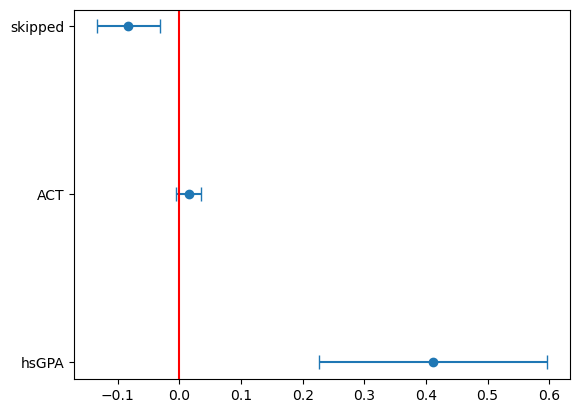

In [20]:
coef = res_gpa.params      # 推定値
varname = coef.index       # 変数名
ci = res_gpa.conf_int()    # 信頼区間を　ci　に入れる
error = ci.iloc[:,1]-coef  # 信頼区間の幅の半分

plt.errorbar(x=coef[1:], y=varname[1:], xerr=error[1:], fmt='o',capsize=5)  # 切片以外のエラーバー
plt.axvline(0, color='red')  # 垂直線
pass

`ACT`の信頼区間に`0`が含まれることが分かる。

## $F$検定

### 説明

回帰分析において複数のOLS推定量に何らかの制約が妥当かどうかを調べる際に使うのが$F$検定である。例えば，次の回帰式の場合

$$
y=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+u
$$

制約式の例として以下が挙げられる。

$\beta_1=\beta_2=\beta_3=0$

$\beta_2=\beta_3=0$

$\beta_2=2\beta_3$

---
帰無仮説と対立仮説は次のようになる。
* 帰無仮説：$\text{H}_0$：制約が成立する
* 対立仮説：$\text{H}_A$：制約は成立しない

検定手順
1. 制約がない回帰式を推定する。
2. 制約がある回帰式を推定する。
3. 次の式に従い$F$値を計算する

    $$
    F=\frac{\left(SSR_1-SSR_0\right)/q}{SSR_0/(n-k-1)}
    =\frac{\left(R_0^2-R_1^2\right)/q}{\left(1-R_0^2\right)/(n-k-1)}
    \sim F_{n-k-1}^q
    $$
    
    左辺の$F$は$F$値、右辺の$F_{n-k-1}^q$は自由度が$q$と$n-k-1$の$F$分布。

4. 有意水準に基づく棄却臨界値と比べる（もしくは$p$値を有意水準と比べる）

上の式で
* $0$：制約がない変数の添え字
* $1$：制約がある変数の添え字
* $SSR$：残差変動の平方和（Residual Sum of Squares）
* $R^2$：決定係数
* $n$：標本の大きさ
* $k$：定数項以外の説明変数（制約がない回帰式）
* $q$：制約式の数

名称：
* $q$を「分子の自由度」と呼ぶ
* $n-k-1$を「分母の自由度」と呼ぶ

---
**＜棄却ルール＞**

$F>F_c(a)$　$\Rightarrow$　$\text{H}_0$を棄却

* $F_c(a)$：棄却臨界値
* $a$：有意水準

（注意）$F$値は必ず正の値をとる。従って，$t$検定の「右片側検定」のパターンしか存在しない。

**＜$p$値を使う場合の手順＞**

* 棄却するための有意水準 $a$を決める（例えば，0.05）
* $p値<a$の場合，$\text{H}_0$を棄却

### 回帰分析

例として米国野球選手（メジャーリーグ）に関するデータ`mlb1`を使う。

In [21]:
mlb1 = wooldridge.data('mlb1')
wooldridge.data('mlb1',description=True)

name of dataset: mlb1
no of variables: 47
no of observations: 353

+----------+----------------------------+
| variable | label                      |
+----------+----------------------------+
| salary   | 1993 season salary         |
| teamsal  | team payroll               |
| nl       | =1 if national league      |
| years    | years in major leagues     |
| games    | career games played        |
| atbats   | career at bats             |
| runs     | career runs scored         |
| hits     | career hits                |
| doubles  | career doubles             |
| triples  | career triples             |
| hruns    | career home runs           |
| rbis     | career runs batted in      |
| bavg     | career batting average     |
| bb       | career walks               |
| so       | career strike outs         |
| sbases   | career stolen bases        |
| fldperc  | career fielding perc       |
| frstbase | = 1 if first base          |
| scndbase | =1 if second base          |
| shrtsto

このデータセットを使い，年俸（`salary`）が次の変数とどう関係するかを考える。
* `years`：メジャーリーグでプレイした期間（年）
* `gamesyr`：年間出場回数
* `bavg`：通算打率
* `hrunsyr`：１シーズンあたりホームラン数
* `rbinsyr`：１シーズンあたり打点

まず制約がない回帰分析をおこなう。

In [22]:
formula_0 = 'np.log(salary) ~ years + gamesyr + bavg + hrunsyr + rbisyr'
res_0 = smf.ols(formula_0, data=mlb1).fit()

#### 例１

**＜制約＞**
`bavg`, `hrunsyr`, `rbisyr`は`salary`に影響を与えない。

$H_0:\;\beta_{\text{bavg}}=\beta_{\text{hrunsyr}}=\beta_{\text{rbisyr}}=0$

$H_A:\;H_0は成立しない$

制約がある場合の回帰分析

In [23]:
formula_1 = 'np.log(salary) ~ years + gamesyr'
res_1 = smf.ols(formula_1, data=mlb1).fit()

##### 手計算

$F$値の計算

In [24]:
# 決定係数
r2_0 = res_0.rsquared
r2_1 = res_1.rsquared

n = res_0.nobs  # 標本の大きさ
k = res_0.df_model  # 定数項以外の説明変数の数
q = 3  # 制約式の数

# F値:
F = (r2_0 - r2_1) / (1 - r2_0) * (n - k - 1) / q
F

9.550253521951914

$a=0.05$の場合の棄却臨界値

In [25]:
a = 0.05
f.ppf(1-a, dfn=q, dfd=n-k-1)   # f.ppfについてはscipy.statsを参照

2.6306414891156504

従って$H_0$を棄却する。

$p$値

In [26]:
1-f.cdf(F, dfn=q, dfd=n-k-1)

4.473708139829391e-06

##### メソッドを使う

制約式の定義

In [27]:
hypotheses = 'bavg = 0, hrunsyr = 0, rbisyr = 0'

`res_0`のメソッド`f_test`を使い、引数に上のセルで定義した制約式`hypotheses`を使う。

In [28]:
res_f_test = res_0.f_test(hypotheses)

`res_f_test`に`F`検定の結果を割り当てたが、そのメソッド`summary()`を使い結果を表示する。

In [29]:
res_f_test.summary()

'<F test: F=9.55025352195203, p=4.473708139838039e-06, df_denom=347, df_num=3>'

上の結果にある記号の意味：
* `F`：$F$値
* `p`：$p$値
* `df_denom`：分母の自由度
* `df_num`：分子の自由度

手計算と同じ結果である。

#### 例２

**＜制約＞**
定数項以外の全ての説明変数は`salary`に影響を与えない。

$H_0:\;\beta_{\text{years}}=\beta_{\text{gamesyr}}=\beta_{\text{bavg}}=\beta_{\text{hrunsyr}}=\beta_{\text{rbisyr}}=0$

$H_A:\;H_0は成立しない$

この場合，`res_0`の`fvalue`から$F$値，`f_pvalue`から$p$値を属性として取得できる。

In [30]:
res_0.fvalue

117.06032008521446

In [31]:
res_0.f_pvalue

2.938042293220727e-72

$p$値は非常に小さな値となっており、0.1%の有意水準でも帰無仮説を棄却できる。

例２の結果はOLS推定結果のメソッド`summary()`で表示される表の中にある`F-statistic`と`Prob(F-statistic)`で確認することもできる。

In [32]:
print(res_0.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(salary)   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     117.1
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           2.94e-72
Time:                        13:42:34   Log-Likelihood:                -385.11
No. Observations:                 353   AIC:                             782.2
Df Residuals:                     347   BIC:                             805.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.1924      0.289     38.752      0.0